In [44]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import missingno as msno

In [45]:
# fetch dataset
adult = fetch_ucirepo(name="Adult")

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [57]:
metadata = adult.metadata
print(metadata)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [75]:
headers = adult.data.headers
print(headers)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [58]:
variables = adult.variables
print(variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [61]:
ids = adult.data.ids
print(ids)

None


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [47]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [48]:
X.shape

(48842, 14)

In [49]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

<Axes: >

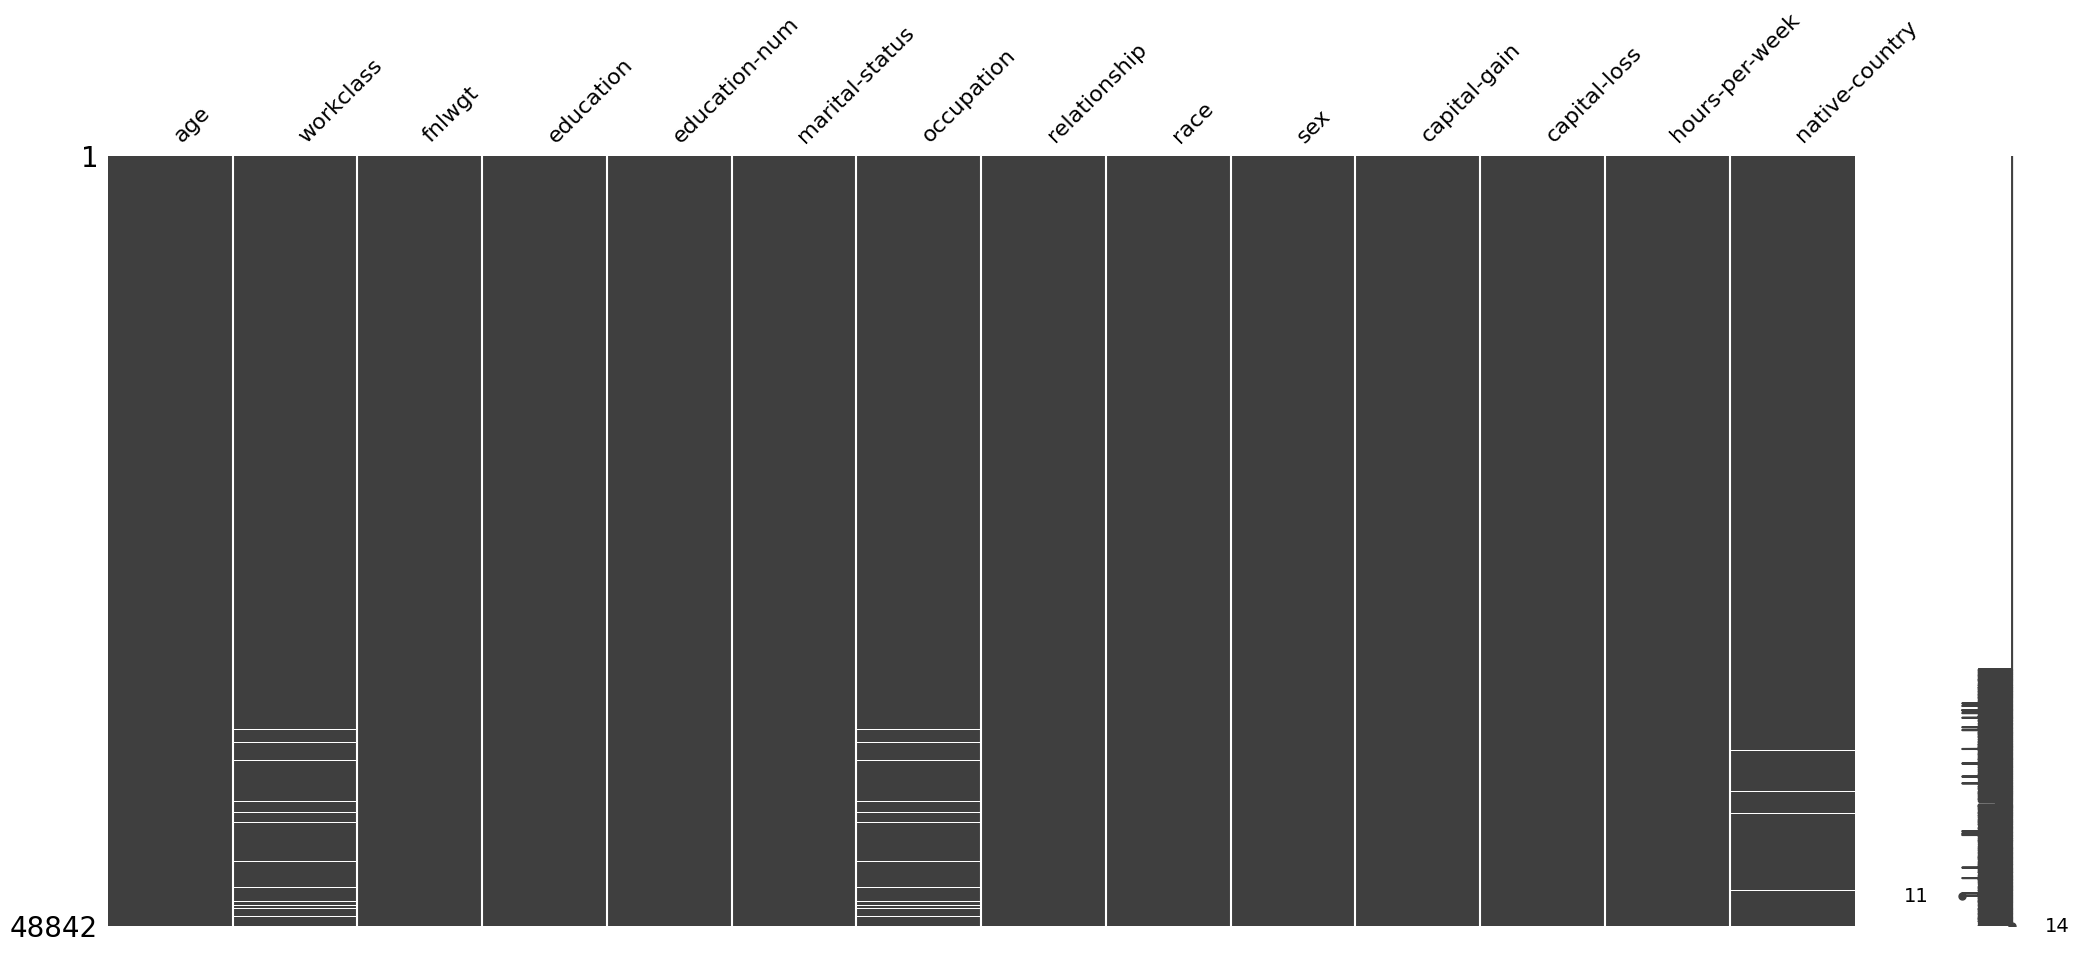

In [50]:
msno.matrix(X)

In [51]:
y.shape

(48842, 1)

In [52]:
y.describe()

,income
count,48842
unique,4
top,<=50K
freq,24720


In [53]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [54]:
y.columns

Index(['income'], dtype='object')

In [55]:
y.income.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [56]:
y.loc[:, "income"] = y["income"].replace({"<=50K.": "<=50K", ">50K.": ">50K"})
y.income.value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [74]:
cols_with_empty_values = ["workclass", "occupation", "native-country"]
total_lines_count = X.shape[0]

for col in cols_with_empty_values:
    empty_line_count = X[col].isnull().sum()
    empty_line_percentage = empty_line_count / total_lines_count * 100
    print(f"{col} empty lines: {empty_line_count} ({empty_line_percentage:.2f}%)")

print("-" * 40)
empty_line_count = X.isnull().any(axis=1).sum()
print(f"total empty lines: {empty_line_count}")

workclass empty lines: 963 (1.97%)
occupation empty lines: 966 (1.98%)
native-country empty lines: 274 (0.56%)
----------------------------------------
total empty lines: 1221


In [72]:
empty_lines = X[X.isnull().any(axis=1)]
print(empty_lines)

       age  workclass  fnlwgt     education  education-num  \
32565   18        NaN  103497  Some-college             10   
32567   29        NaN  227026       HS-grad              9   
32574   58        NaN  299831       HS-grad              9   
32580   40    Private   85019     Doctorate             16   
32583   72        NaN  132015       7th-8th              4   
...    ...        ...     ...           ...            ...   
48769   21        NaN  212661  Some-college             10   
48800   73        NaN  144872       HS-grad              9   
48812   81        NaN   26711     Assoc-voc             11   
48826   50  Local-gov  139347       Masters             14   
48838   64        NaN  321403       HS-grad              9   

           marital-status      occupation    relationship                race  \
32565       Never-married             NaN       Own-child               White   
32567       Never-married             NaN       Unmarried               Black   
32574  Marri

In [76]:
# Tableau croisé des effectifs
pd.crosstab(X["marital-status"], y["income"])

income,<=50K,>50K
marital-status,,
Divorced,5962,671
Married-AF-spouse,23,14
Married-civ-spouse,12395,9984
Married-spouse-absent,570,58
Never-married,15384,733
Separated,1431,99
Widowed,1390,128


In [77]:
# Tableau croisé des effectifs
pd.crosstab(X["sex"], y["income"])

income,<=50K,>50K
sex,,
Female,14423,1769
Male,22732,9918


In [78]:
X["sex"].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [81]:
from scipy.stats import chi2_contingency

table = pd.crosstab(X["relationship"], y["income"])
chi2, p, dof, expected = chi2_contingency(table)
print(f"p-value: {p}")

p-value: 0.0


In [82]:
X["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [83]:
X["relationship"].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64